
## <font color=red> You should not import any new libraries. Your code should run with python=3.x</font>
## <font color=red> Please don't rename this .ipynb file.</font><br>
- Your solutions will be auto-graded. Hence we request you to follow the instructions.
- Modify the code only between 
```
## TODO
## END TODO
```
- In addition to above changes, you can play with arguments to the functions for generating plots
- We will run the auto grading scripts with private test data

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import math

##LOAD DATA

In [6]:
X = np.load('./data/train_X.npy')
Y = np.array([np.load('./data/train_y.npy')]).T

Normalization / Standardization

In [7]:
def normalize(X):
  """
  Implement Normalization for input image features

  Args:
  X : numpy array of shape (n_samples, 784)
   
  Returns:
  X_norm : numpy array of shape (n_samples, 784) after normalization
  """
  X_norm = None
  
  ## TODO
  X_norm = np.zeros(X.shape)
  
  for i in range(X.shape[1]):
    if np.std(X[:, i]) != 0:
        X_norm[:, i] = (X[:, i] - np.mean(X[:, i]))/np.std(X[:,i])
    
  ## END TODO

  assert X_norm.shape == X.shape

  return X_norm

def scaling(X):
  """
  Implement MinMax Scaling on input image features

  Args:
  X : numpy array of shape (n_samples, 784)
   
  Returns:
  X_scaled : numpy array of shape (n_samples, 784)
  """
  X_scaled = None

  ##TODO
  X_scaled = np.zeros(X.shape)
  
  for i in range(X.shape[1]):
    if np.max(X[:,i] != np.min(X[:,i])):
        X_scaled[:, i] = (X[:, i] - np.min(X[:, i]))/(np.max(X[:,i]) - np.min(X[:,i]))
  
  ##END TODO
  
  assert X_scaled.shape == X.shape

  return X_scaled

### Split data into train/val

In [8]:
def split_data(X, Y, train_ratio=0.8):
    '''
    Split data into train and validation sets
    The first floor(train_ratio*n_sample) samples form the train set
    and the remaining the test set

    Args:
    X - numpy array of shape (n_samples, n_features)
    Y - numpy array of shape (n_samples, 1)
    train_ratio - fraction of samples to be used as training data

    Returns:
    X_train, Y_train, X_val, Y_val
    '''
    # Try Normalization and scaling and store it in X_transformed
    X_transformed = X

    ## TODO
    
    X = normalize(X)
    X_transformed = scaling(X)
    
    ## END TODO

    assert X_transformed.shape == X.shape

    num_samples = len(X)
    indices = np.arange(num_samples)
    num_train_samples = math.floor(num_samples * train_ratio)
    train_indices = np.random.choice(indices, num_train_samples, replace=False)
    val_indices = list(set(indices) - set(train_indices))
    X_train, Y_train, X_val, Y_val = X_transformed[train_indices], Y[train_indices], X_transformed[val_indices], Y[val_indices]
  
    return X_train, Y_train, X_val, Y_val

**Plotting image**

In [9]:
def plot_image(x, y, idx):
  """
  Plot the given feature vector into image of size 28 X 28 
  note that originally the image was of size 28*28 which is flattened or unrolled
  to 784 X 1 feature vector

  Args:
  x : numpy array of images
  y : numpy array of ground truth labels for images
  idx : index of the image
  """

  image = np.reshape(x[idx], (28,28))
  plt.imshow(image, interpolation='nearest')
  plt.show()
  print (f'The ground truth label for this iamge is : {y[idx]}')

Encode 1 for any one of the class and 0 to all other remaining class for all labels

In [10]:
def get_data_for_class(X,Y,id):
  """
  Args:
  X : numpy array of input features, shape - (n_samples x 784)
  Y : numpy array of input targets, shape - (n_samples x 1)
  id : class id (one of 1,4,7,9)

  Returns:
  class_X : numpy array of input features, shape - (n_samples x 784)
  class_Y : numpy array of input targets, where class_Y[i]=1 if Y[i]=id else class_Y[i]=0, shape - (n_samples x 784)
  """
  class_X, class_Y = None, None

  ##TODO
  
  class_X = X
  class_Y = np.array([1 if y == id else 0 for y in Y]) 
  class_Y = class_Y.reshape(Y.shape)
  
  ##END TODO

  assert class_X.shape == X.shape and class_Y.shape == Y.shape

  return class_X, class_Y

Random Sampling

In [11]:
def sample_training_points(X, y, sample_size):
  """
  Takes input features, targets and sample size, and returns random sample of size = sample_size

  Args: 
  X : numpy array of shape (n_samples , n_features)
  y : numpy array of shape (n_samples , 1)
  
  Returns: 
  sampled_X : numpy array of shape (sample_size , n_eatures)
  sampled_y : numpy array of shape (sample_size , 1)

  """
  sampled_X , sampled_y = None, None
  
  ##TODO
  n = int(sample_size)
  data = np.column_stack((X, y))
        
  data = np.random.permutation(data)
  data_sample = data[:n, :]
  
  col_size = data.shape[1]
  sampled_y = data_sample[:, col_size-1] 
  sampled_X = data_sample[:, :col_size-1]
  sampled_y = sampled_y.reshape((n,1))
    
  ##END TODO

  assert sampled_X.shape==(sample_size,X.shape[1]) and sampled_y.shape==(sample_size,1)
  
  return sampled_X, sampled_y

LOGISTIC REGRESSION CLASSIFIER

In [12]:
def sigmoid(weights, bias, X):
  """
  Implement logistic/ sigmoid function

  Args:
  weights : numpy array of shape (n_dimension , 1)
  bias : scaler
  X : numpy array of shape (n_samples , n_dimension)

  Returns: 
  Y_sigmoid : numpy array of shape (n_samples, 1)
  """
  Y_sigmoid = None

  ##TODO
  Y = np.matmul(X, weights) + bias
  Y_sigmoid = 1/(1 + np.exp(-1*Y))
  Y_sigmoid = Y_sigmoid.reshape((X.shape[0], 1))
  
  ##END TODO
  assert Y_sigmoid.shape == (X.shape[0],1)

  return Y_sigmoid

def cross_entropy_loss(weights, bias, X, y):
  """
  Takes input features, weights, bias and target 
  and calculates binary cross entropy loss between y and predicted values of y.

  Args:
  weights : numpy array of shape (n_features, 1)
  bias : scalar
  X : numpy array of shape (n_samples, 1)
  y : numpy array of shape (n_samples, 1)
  
  Returns :
  loss : single float value
  """
  loss = 0.0

  ##TODO

  y_pred = np.matmul(X, weights) + bias
  loss = np.sum(np.multiply(y, y_pred) - np.log(1+np.exp(y_pred)))
  loss = -1*(loss/(y.shape[0]))
    
  ##END TODO
  
  return loss
  
def grad(X, y, weights, bias):

  """
  Return gradient for weights and biases

  Args:
  X : numpy array of shape (n_samples , n_dimension)
  y : numpy array of shape (n_samples , 1)
  weights : numpy array of shape (n_dimension , 1)
  bias : scalar

  Returns: 
  gradient : [dw , db]
              dw - numpy array of shape (n_dimension , 1)
              db - numpy array of shape (1)
  """

  dw , db = None , None

  ##TODO
  
  n = int(X.shape[0])
  dw = (1/n)*(np.matmul(X.T, (y - sigmoid(weights,bias,X))))
  db = (1/n)*np.sum(y - sigmoid(weights,bias,X))
    
  dw = dw.reshape(weights.shape)
  db = db.reshape(1)
  
  ##END TODO

  assert dw.shape == weights.shape 

  gradient = [dw , db]

  return gradient

def logistic_regression(X, y, epoch, lr, sample_size):
  """
  Args :

  X : numpy array of inpuy features of shape (n_samples, n_features)
  y : numpy array of targets of shape (n_samples, 1)
  epochs : number of iterations of training
  lr : learning_rate
  sample_size : batch_size for each iteration

  Returns : 
  loss : list containg loss for each epoch
  weights : numpy array of shape (n_features, 1)
  bias :  scaler
  """

  loss, weights, bias = [], None, 0
  #define weights and bias (w, b) initialize the weight

  ##TODO
  weights = np.zeros((X.shape[1], 1))
  for i in range(epoch):
        
    samp_X, samp_Y = sample_training_points(X, y, sample_size)
    gradient = grad(samp_X, samp_Y, weights, bias)

    weights = weights + lr*gradient[0]
    bias = bias + lr*gradient[1]
    
    loss.append(cross_entropy_loss(weights, bias, X, y))
    
  ##TODO
  assert len(loss) == epoch and weights.shape == (X.shape[1],1)

  return [loss, weights, bias]

def train_multi_class(X, Y):
  """
  make multi class classifier using binary classification (1 vs all)

  Args:
  X : numpy array of input features of shape (n_samples, n_features)
  Y : numpy array of input features of shape (n_samples, 1)

  Returns:

  param_list : list of param for all classifiers, where param = [weights, bias]
  loss_list : list of lists of losses of all classifiers for all epochs
  """

  digits = [1,4,7,9]
  param_list = []
  loss_list = []


  #train i vs all weights and bias, where i in {1,4,7,9}
  epochs , lr , sample_size = 500, 0.01, 120

  for i in digits:
    X_train, Y_train = get_data_for_class(X, Y, id=i)
    output = logistic_regression(X_train, Y_train, epochs, lr, sample_size)
    param_list.append(output[1:]) 
    loss_list.append(output[0])   

  return param_list, loss_list

In [13]:
def to_class(predicts):
  """
  Args: 
  predicts : numpy array of shape (n_samples, 4)
  
  Return:
  predicted classes : numpy array of shape(num_samples, class_id), where class_id in {1,4,7,9}
  
  """
  labels = {0:1, 1:4, 2:7, 3:9}
  predicted_class = []
  for i in range(predicts.shape[0]):
    label = np.argmax(predicts[i])
    predicted_class.append(labels[label])

  return np.array(predicted_class).reshape(len(predicted_class),1)

def prediction(param, X):
  """
  It return the array of predicted class for all samples in X                                    

  Args: 
  param[0] = [w,b] of class 1 vs all
  param[1] = [w,b] of class 4 vs all
  param[2] = [w,b] of class 7 vs all
  param[3] = [w,b] of class 9 vs all

  X = numpy array of input features, shape (n_samples , 784)

  Returns:
  predicts = numpy array for shape (n_samples , 4), 
             where predicts[i][j] is probablity that sample i belongs to class j when using classifer j vs all

  """

  predicts = None

  ##TODO
  predicts = np.zeros((X.shape[0], 4))
  for i in range(4):
    temp = sigmoid(param[i][0], param[i][1], X)
    predicts[:, i] = temp.reshape(temp.shape[0])
  
  ##END TODO
  assert predicts.shape == (X.shape[0],4)

  return predicts

In [14]:
def accuracy(Y_pred, Y_true):

  '''
  This functions calculates accuracy for -
    1) each of the 4 class 
    2) whole dataset
    Note : Do not report in percentage

  Args:
  Y_pred : Predicted class labels, numpy array of shape (n_samples , 1)
  Y_true : True/Actual class labels, numpy array of shape (n_samples , 1)

  Returns:
  list of length 5, 1 st value is overall accuracy followed by accuracy of all 4 individual classifies
  '''
  
  total_accuracy = np.sum(Y_pred==Y_true)/Y_true.shape[0]
  accuracy_1 , accuracy_4 , accuracy_7 , accuracy_9 = 0, 0, 0, 0
  #TODO
  
  ids = []
  for i in range(Y_true.shape[0]):
        if Y_pred[i] == Y_true[i]:
            ids.append(i)
            
  accuracy_1 = np.sum((Y_pred==1)==(Y_true==1))/Y_true.shape[0]
  accuracy_4 = np.sum((Y_pred==4)==(Y_true==4))/Y_true.shape[0]
  accuracy_7 = np.sum((Y_pred==7)==(Y_true==7))/Y_true.shape[0]
  accuracy_9 = np.sum((Y_pred==9)==(Y_true==9))/Y_true.shape[0]
    
  ##END TO

  print("Total Accuray : ", total_accuracy) 
  print("Accuray class 1 : ", accuracy_1) 
  print("Accuray class 4 : ", accuracy_4) 
  print("Accuray class 7 : ", accuracy_7) 
  print("Accuray class 9 : ", accuracy_9) 

  return [total_accuracy, accuracy_1, accuracy_4, accuracy_7, accuracy_9]

In [15]:
def calculate_metrics(Y_pred, Y_true):

  '''
  This functions calculates precision, recall and f1-score for -
    1) each of the 4 class 
    2) whole dataset
    Note : Do not report in percentage

  Args:
  Y_pred : Predicted class labels, numpy array of shape (n_samples , 1)
  Y_true : True/Actual class labels, numpy array of shape (n_samples , 1)

  Returns:
  (precision , recall , f1_score) : a tuple of 3 lists i.e. precison, recall and f1_score where
          precision : list of length 5, 1 st value is overall precison followed by precision of all 4 individual classes
          recall : list of length 5, 1 st value is overall recall followed by recall of all 4 individual classes
          f1_score : list of length 5, 1 st value is overall f1-score followed by f1-score of all 4 individual classes
  '''

  precision , recall , f1_score = [], [] ,[]

  ## TODO
  ids = []
  for i in range(Y_true.shape[0]):
        if Y_pred[i] == Y_true[i]:
            ids.append(i)
  
  tp_1 = np.sum([1 if Y_pred[i] == 1 else 0 for i in ids])
  prec_den_1 = np.sum(Y_pred == 1)
  rec_den_1 = np.sum(Y_true == 1)
  prec_1 = tp_1/prec_den_1
  rec_1 = tp_1/rec_den_1
  f_1 = (2*prec_1*rec_1)/(prec_1+rec_1)
  
  tp_4 = np.sum([1 if Y_pred[i] == 4 else 0 for i in ids])
  prec_den_4 = np.sum(Y_pred == 4)
  rec_den_4 = np.sum(Y_true == 4)
  prec_4 = tp_4/prec_den_4
  rec_4 = tp_4/rec_den_4
  f_4 = (2*prec_4*rec_4)/(prec_4+rec_4)

  tp_7 = np.sum([1 if Y_pred[i] == 7 else 0 for i in ids])
  prec_den_7 = np.sum(Y_pred == 7)
  rec_den_7 = np.sum(Y_true == 7)
  prec_7 = tp_7/prec_den_7
  rec_7 = tp_7/rec_den_7
  f_7 = (2*prec_7*rec_7)/(prec_7+rec_7)

  tp_9 = np.sum([1 if Y_pred[i] == 9 else 0 for i in ids])
  prec_den_9 = np.sum(Y_pred == 9)
  rec_den_9 = np.sum(Y_true == 9)
  prec_9 = tp_9/prec_den_9
  rec_9 = tp_9/rec_den_9
  f_9 = (2*prec_9*rec_9)/(prec_9+rec_9)

  prec = (rec_den_1*prec_1 + rec_den_4*prec_4 + rec_den_7*prec_7 + rec_den_9*prec_9)/(Y_true.shape[0])
  rec = (rec_den_1*rec_1 + rec_den_4*rec_4 + rec_den_7*rec_7 + rec_den_9*rec_9)/(Y_true.shape[0])
  f = (rec_den_1*f_1 + rec_den_4*f_4 + rec_den_7*f_7 + rec_den_9*f_9)/(Y_true.shape[0])
  
  precision = [prec, prec_1, prec_4, prec_7, prec_9]
  recall = [rec, rec_1, rec_4, rec_7, rec_9]
  f1_score = [f, f_1, f_4, f_7, f_9]
  

  ## END TODO

  assert len(precision)==5 and len(recall)==5 and len(f1_score)==5
  return (precision, recall, f1_score)

In [16]:
def plot_training_loss(loss_list):
  labels = ["1", "4", "7", "9"]
  for ids, loss in enumerate(loss_list):
    plt.plot(loss, label = labels[ids])
  plt.legend(loc='best')
  plt.title('Training Loss of each class (1 vs all)')
  plt.show()

In [17]:
X_train, Y_train, X_val, Y_val = split_data(X,Y)
param_lists, loss_list = train_multi_class(X_train, Y_train)

## Plot curve for loss

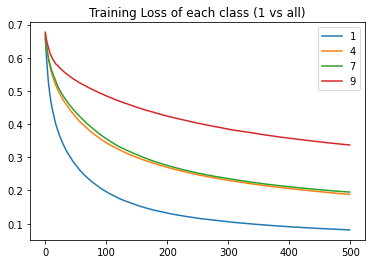

In [18]:
plot_training_loss(loss_list)

## Calculate accuracy, precision , recall and F1-score

In [19]:
Y_pred = to_class( prediction(param_lists, X_val) )

In [20]:
accuracy(Y_pred, Y_val)

Total Accuray :  0.915
Accuray class 1 :  0.9825
Accuray class 4 :  0.9575
Accuray class 7 :  0.955
Accuray class 9 :  0.935


[0.915, 0.9825, 0.9575, 0.955, 0.935]

In [21]:
precision, recall, f1_score = calculate_metrics(Y_pred, Y_val)